# <center> Cars - Purchase Decision 

- About Dataset

This is a purchase decision data set, indicating wheather or not a client bought a car.

This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries

#### Columns
- User ID
- Gender
- Age
- Annual Salary
- Purchase Decision (No = 0, Yes = 1)

- **Problem Statement**

Here we have to build a model for predicting whether a person will purchase a car based on available information.

# Importing Dataset

In [60]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab as pl
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Getting data using pd.read_csv()
df = pd.read_csv("car_data.csv")

In [62]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [63]:
df.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


# Exploratory Data Analysis

In [64]:
# Number of elements in data
df.size

5000

In [65]:
# Dimensionality of dataset
df.shape

(1000, 5)

In this dataset we have total 1000 records 5 features.

In [66]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


User ID is unique feature identifying each customer seperately.

Gender is only categorical column.

It looks like null count is zero for all variables.

In [67]:
# Statistical summary 
df.describe(include='all')

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,516,NaN,NaN,NaN
mean,500.500000,NaN,40.106000,72689.000000,0.402000
std,288.819436,NaN,10.707073,34488.341867,0.490547
min,1.000000,NaN,18.000000,15000.000000,0.000000
25%,250.750000,NaN,32.000000,46375.000000,0.000000
50%,500.500000,NaN,40.000000,72000.000000,0.000000
75%,750.250000,NaN,48.000000,90000.000000,1.000000


Age and Annual Salary shows right skewed distribution.

Age range of buyers is 18 to 63.

Annual salary is ranging from 15000 to 152500.

Average age and salary is 40 and 72689.

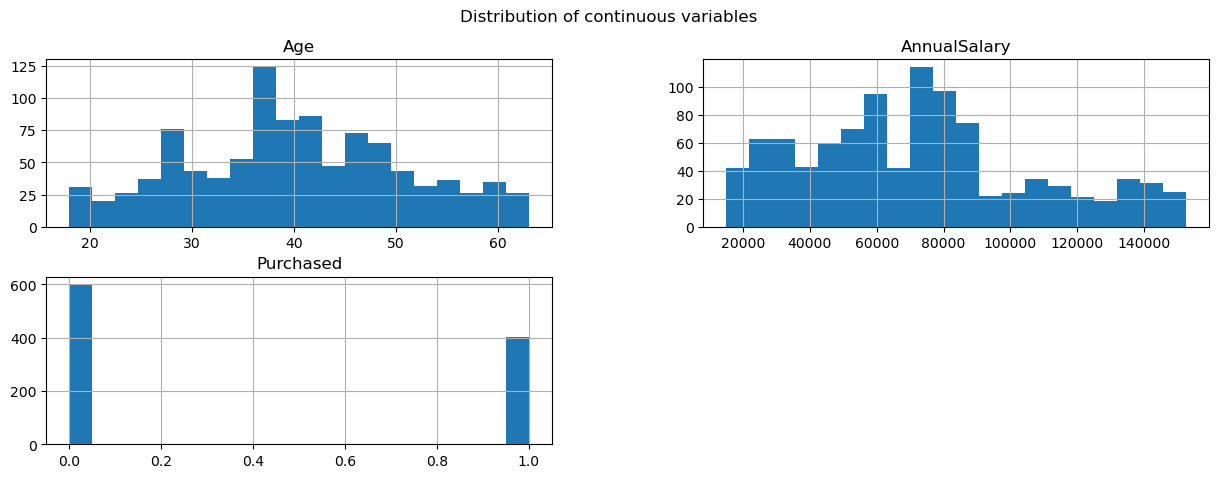

In [68]:
# Distribution of continuous variables
df.iloc[:,1:].hist(bins=20, figsize=(15,5))
plt.suptitle('Distribution of continuous variables')
plt.show()

Here we can see number of actual buyers are around 400.

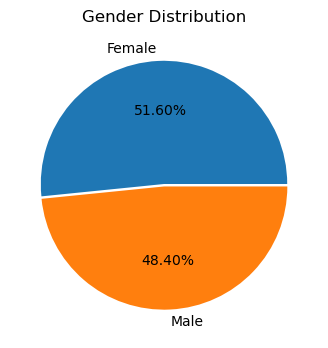

In [69]:
# Pie chart of Gender
plt.figure(figsize=(4,4))
plt.pie(df.Gender.value_counts(), labels=['Female', 'Male'], autopct='%.2f%%', explode=[0,0.02])
plt.title('Gender Distribution')
plt.show()

In dataset number of females are slightly higher than males.

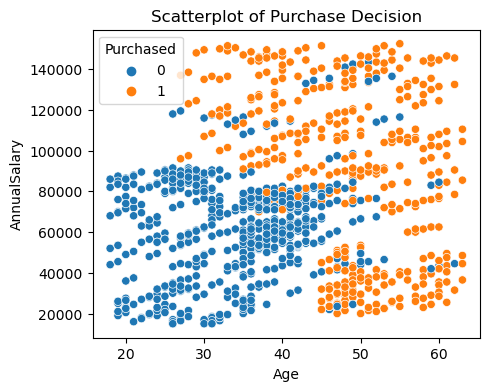

In [70]:
# Scatterplot of Age and Annual Salary
plt.figure(figsize=(5,4))
sns.scatterplot(x=df.Age, y=df.AnnualSalary, hue=df.Purchased)
plt.title('Scatterplot of Purchase Decision')
plt.show()

In above scatterplot we can see if age of buyer is greater than 45 and his annual salary is greater than 90000 then 
chances of purchasing a car increases.

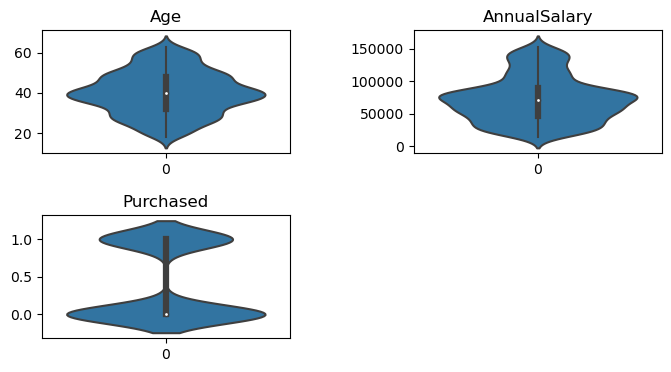

In [71]:
# Boxplot for outliers
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
sns.violinplot(df.Age)
plt.title('Age')

plt.subplot(2,2,2)
sns.violinplot(df.AnnualSalary)
plt.title('AnnualSalary')

plt.subplot(2,2,3)
sns.violinplot(df.Purchased)
plt.title('Purchased')

pl.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

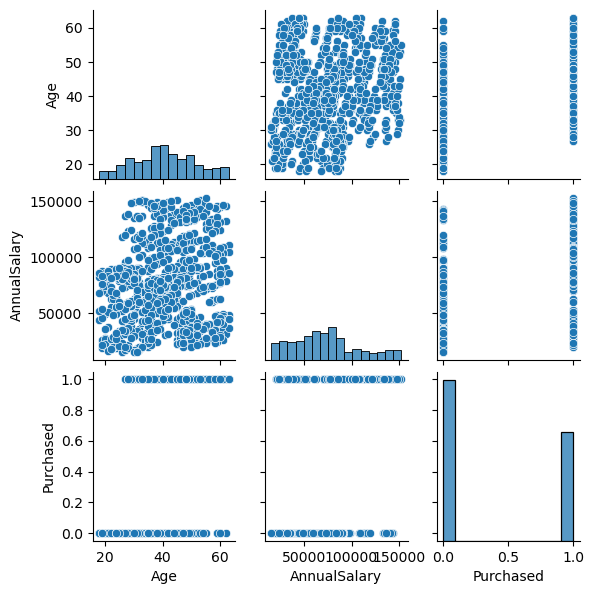

In [72]:
# Pairwise relationship 
sns.pairplot(df.iloc[:,1:], height=2)
plt.show()

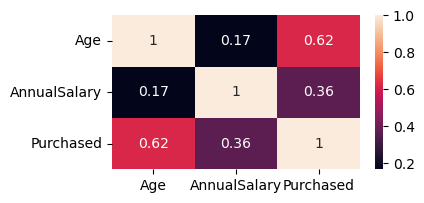

In [73]:
# Heatmap of correlation
plt.figure(figsize=(4,2))
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

Here we can see that Age and Annual salary is showing positive correlation with purchase decision.

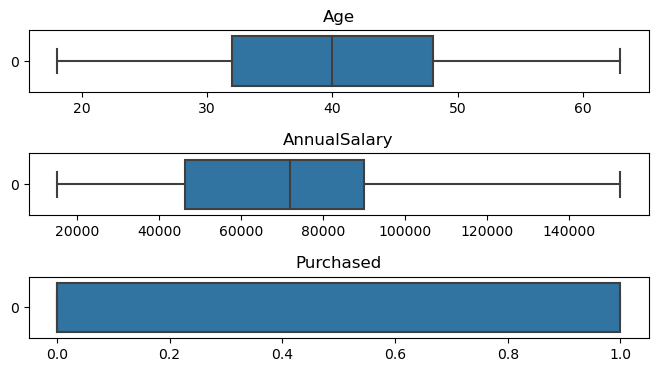

In [74]:
# Boxplot for outliers
plt.figure(figsize=(8,4))
plt.subplot(3,1,1)
sns.boxplot(df.Age, orient='h')
plt.title('Age')

plt.subplot(3,1,2)
sns.boxplot(df.AnnualSalary, orient='h')
plt.title('AnnualSalary')

plt.subplot(3,1,3)
sns.boxplot(df.Purchased, orient='h')
plt.title('Purchased')

pl.subplots_adjust(hspace=1)
plt.show()

It looks like we dont have any outliers in data.

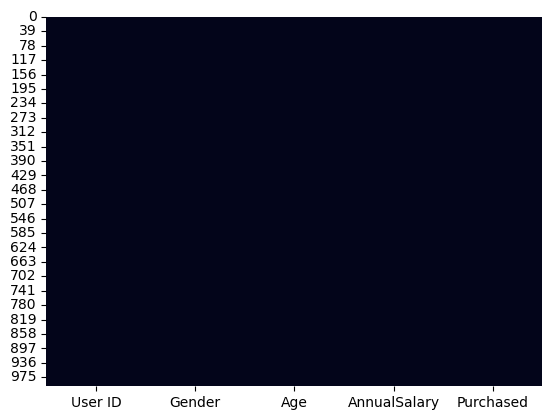

In [75]:
# Heatmap for missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

This is a complete data set with no missing values.

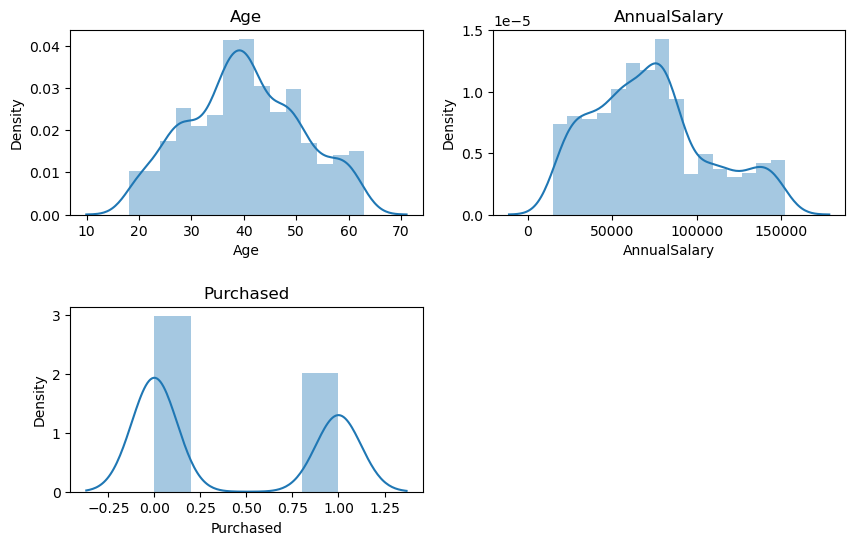

In [76]:
# Distribution of continuous variables
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.distplot(df.Age)
plt.title('Age')

plt.subplot(2,2,2)
sns.distplot(df.AnnualSalary)
plt.title('AnnualSalary')

plt.subplot(2,2,3)
sns.distplot(df.Purchased)
plt.title('Purchased')

pl.subplots_adjust(hspace=0.5)
plt.show()

In [77]:
# Saving copy of dataset
dataset = df.copy(deep=True)

# Data preprocessing

In [78]:
# Categorical encoding 
dummy = pd.get_dummies(df.Gender)
df = pd.concat([df,dummy], axis=1)  # Concating dummy variables to dataframe

In [79]:
df.drop('Gender', axis=1, inplace=True)  # Dropping Gender feature
df.head()

,User ID,Age,AnnualSalary,Purchased,Female,Male
0,385,35,20000,0,0,1
1,681,40,43500,0,0,1
2,353,49,74000,0,0,1
3,895,40,107500,1,0,1
4,661,25,79000,0,0,1


In [80]:
# Check for missing values
df.isnull().sum()

User ID         0
Age             0
AnnualSalary    0
Purchased       0
Female          0
Male            0
dtype: int64

In [81]:
# Ckeck for not available values
df.isna().any()

User ID         False
Age             False
AnnualSalary    False
Purchased       False
Female          False
Male            False
dtype: bool

In [82]:
# Check for duplicated data
df.duplicated().any()

False

In [83]:
# Changing datatype of sex
df['Female'] = df.Female.astype('category')
df['Male'] = df.Male.astype('category')

In [84]:
# Checking outliers using z score 
from scipy.stats import zscore
outlier = zscore(df.drop(['Female','Male','User ID'],axis=1))

In [85]:
outlier[abs(outlier)>3].any()

Age             False
AnnualSalary    False
Purchased       False
dtype: bool

We have used 3 as our threshold value for detecting outliers.

It looks like data dont have any outlier values. 

In [86]:
# Count of unique values
df.Purchased.value_counts()

0    598
1    402
Name: Purchased, dtype: int64

Target column might not be perfectly balanced but it's not highly imbalanced either.

In [90]:
# Seperating Independent and Dependent variables
x = df.drop(['Purchased','User ID'], axis=1)
y = df.Purchased

**Feature Scaling**

Scaling data is an important step in machine learning project as large data values can create biased results. Using feature scaling we try to bring all data points in similar scale so that comparison will be fair.

In [94]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Age','AnnualSalary']] = scaler.fit_transform(x[['Age','AnnualSalary']])

**Feature Selection**

Feature selection is a process of identifying significant features. Here we will use Chi square for feature selection.

In [134]:
# Importing chi2_contingency from scipy.stats
from scipy.stats import chi2_contingency

In [142]:
chi_pvalue = []
for col in dataset.iloc[:,1:-1].columns:
    t1 = pd.crosstab(dataset[col],dataset.iloc[:,-1])
    pvalue = chi2_contingency(t1)[1]
    chi_pvalue.append(pvalue)

In [147]:
feat_imp = pd.DataFrame()   # Creating dataframe of feature importance
feat_imp['Features'] = dataset.iloc[:,1:-1].columns
feat_imp['Imp'] = chi_pvalue
feat_imp[feat_imp.Imp<0.05]

,Features,Imp
1,Age,3.849604e-68
2,AnnualSalary,7.054737e-20


Ho: No relation between two variables

Ha: There is a relation between two variables

Only Age and AnnualSalary found to be significant.

In [148]:
# Train test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x.drop(['Female','Male'],axis=1), y, test_size=0.2, random_state=42)

In [150]:
print('shape of train_x:',train_x.shape)
print('shape of train_y:',train_y.shape)
print('shape of test_x:',test_x.shape)
print('shape of test_y:',test_y.shape)

shape of train_x: (800, 2)
shape of train_y: (800,)
shape of test_x: (200, 2)
shape of test_y: (200,)


Now our data is processed and ready for model building.

# Model Building

### Model 1:  Logistic Regression

Logistic regression is a supervised learning algorithm. Here in this case we have to perform binary classification.

In [209]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)  # Training the model

LogisticRegression()

In [210]:
# Predicting on test data
log_reg_pred = log_reg.predict(test_x)
log_reg_pred_prob = log_reg.predict_proba(test_x)
log_reg_pred_prob = log_reg_pred_prob[:,1]

In [211]:
# Performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('training score: %0.2f' %log_reg.score(train_x,train_y),'\n')
print('testing score: %0.2f' %log_reg.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, log_reg_pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, log_reg_pred),'\n')
print('Classification report: \n',classification_report(test_y, log_reg_pred))

training score: 0.83 

testing score: 0.82 

Accuracy is: 0.82 

confusion matrix: 
 [[104   8]
 [ 28  60]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       112
           1       0.88      0.68      0.77        88

    accuracy                           0.82       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.83      0.82      0.82       200



In [212]:
# Selecting best threshold
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, threshold = roc_curve(test_y, log_reg_pred_prob)

acc = []

for i in threshold:
    y_pred = np.where(log_reg_pred_prob > i, 1, 0)
    acc.append(accuracy_score(test_y, y_pred))
    
results = pd.concat([pd.Series(threshold),pd.Series(acc)], axis=1)
results.columns = ['threshold', 'accuracy']
results.sort_values(by='accuracy', ascending=False, inplace=True)
results.head()

,threshold,accuracy
19,0.438675,0.830
20,0.433423,0.825
18,0.442410,0.825
16,0.497380,0.820
21,0.406137,0.820


Logistic regression model accuracy is 0.82.

F1 score is 0.77.

Next we will try to increase performance of model using GridsearchCV.

**Grid Search CV**

In [213]:
# Hypertunning using GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

tuned_paramaters = [{'penalty':['l1','l2','Elasticnet'],
                    'C':[1,4,5,8,10], 
                    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                    'max_iter':[100, 500, 1000]
                    }]

log = LogisticRegression()                                  

log_reg_cv = GridSearchCV(log,
                          param_grid=tuned_paramaters, 
                          cv=kfold, 
                          verbose=1,
                          return_train_score=True)

log_reg_cv.fit(train_x, train_y)                                    

Fitting 3 folds for each of 270 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 4, 5, 8, 10], 'max_iter': [100, 500, 1000],
                          'penalty': ['l1', 'l2', 'Elasticnet'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             return_train_score=True, verbose=1)

In [214]:
# Best parameters
log_reg_cv.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [215]:
# Best estimator
log_reg_cv.best_estimator_

LogisticRegression(C=1, solver='liblinear')

In [216]:
# Training model using best parameters
log_reg1 = LogisticRegression(C=1, solver='liblinear') 
log_reg1 = log_reg1.fit(train_x,train_y)

# Predicting on test_x
log_reg1_pred = log_reg1.predict(test_x)

In [217]:
# Performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('training score: %0.2f' %log_reg1.score(train_x,train_y),'\n')
print('testing score: %0.2f' %log_reg1.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, pred),'\n')
print('Classification report: \n',classification_report(test_y, pred))

training score: 0.83 

testing score: 0.82 

Accuracy is: 0.82 

confusion matrix: 
 [[104   8]
 [ 28  60]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       112
           1       0.88      0.68      0.77        88

    accuracy                           0.82       200
   macro avg       0.84      0.81      0.81       200
weighted avg       0.83      0.82      0.82       200



Here we can observe even after performing hypertuning, logistic regression model accuracy is same.

So we will try other algorithms.

## Model 2: Decision Tree

In [219]:
# Building Decision tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [220]:
# Prediction on test data
tree_pred = tree.predict(test_x)

In [221]:
# Performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('training score: %0.2f' %tree.score(train_x,train_y),'\n')
print('testing score: %0.2f' %tree.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, tree_pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, tree_pred),'\n')
print('Classification report: \n',classification_report(test_y, tree_pred))

training score: 0.99 

testing score: 0.89 

Accuracy is: 0.89 

confusion matrix: 
 [[105   7]
 [ 15  73]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       112
           1       0.91      0.83      0.87        88

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.89       200
weighted avg       0.89      0.89      0.89       200



Accuracy of decision tree (0.89) is higher than logistic regression (0.82) but we can see model is overfitting as train score is higher than test score. 

To avoid overfitting we will tune hyperparameters.

**Grid Search CV**

In [229]:
# Performing GridSearchCV on Decision Tree model
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuned_paramaters = [{'criterion':['gini','entropy'], 
                     'max_depth':[3,4,5,6], 
                     'min_samples_split':[2,4,6,8,10], 
                     'min_samples_leaf':[1,2,3,4], 
                    }]

dt = DecisionTreeClassifier() 

dt_cv = GridSearchCV(dt,
                     param_grid=tuned_paramaters, 
                     cv=kfold, 
                     verbose=1,
                     return_train_score=True)

dt_cv.fit(train_x, train_y)        

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 4, 5, 6],
                          'min_samples_leaf': [1, 2, 3, 4],
                          'min_samples_split': [2, 4, 6, 8, 10]}],
             return_train_score=True, verbose=1)

In [230]:
# Best parameters and best estimator
print(dt_cv.best_params_)
print(dt_cv.best_estimator_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)


In [225]:
# Building Decision Tree model using best parameters
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3) 
tree1 = tree1.fit(train_x,train_y)

# Predicting on test data
tree1_pred = tree1.predict(test_x)

In [226]:
# Performance metrics
print('training score: %0.2f' %tree1.score(train_x,train_y),'\n')
print('testing score: %0.2f' %tree1.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, tree1_pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, tree1_pred),'\n')
print('Classification report: \n',classification_report(test_y, tree1_pred))

training score: 0.91 

testing score: 0.90 

Accuracy is: 0.90 

confusion matrix: 
 [[105   7]
 [ 13  75]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       112
           1       0.91      0.85      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.90      0.90       200



After hypertuning model accuracy is increased to 0.90 and model is genralized.

f1 score is 0.88.

In [77]:
#from sklearn import tree
#import graphviz
#names = ['Age', 'AnnualSalary']
#class1 = ['Purchased']

#dot_data = tree.export_graphviz(tree1, out_file=None, filled=True, rounded=True,feature_names=names,class_names=Purchased)
#graph = graphviz.Source(dot_data)  
#graph

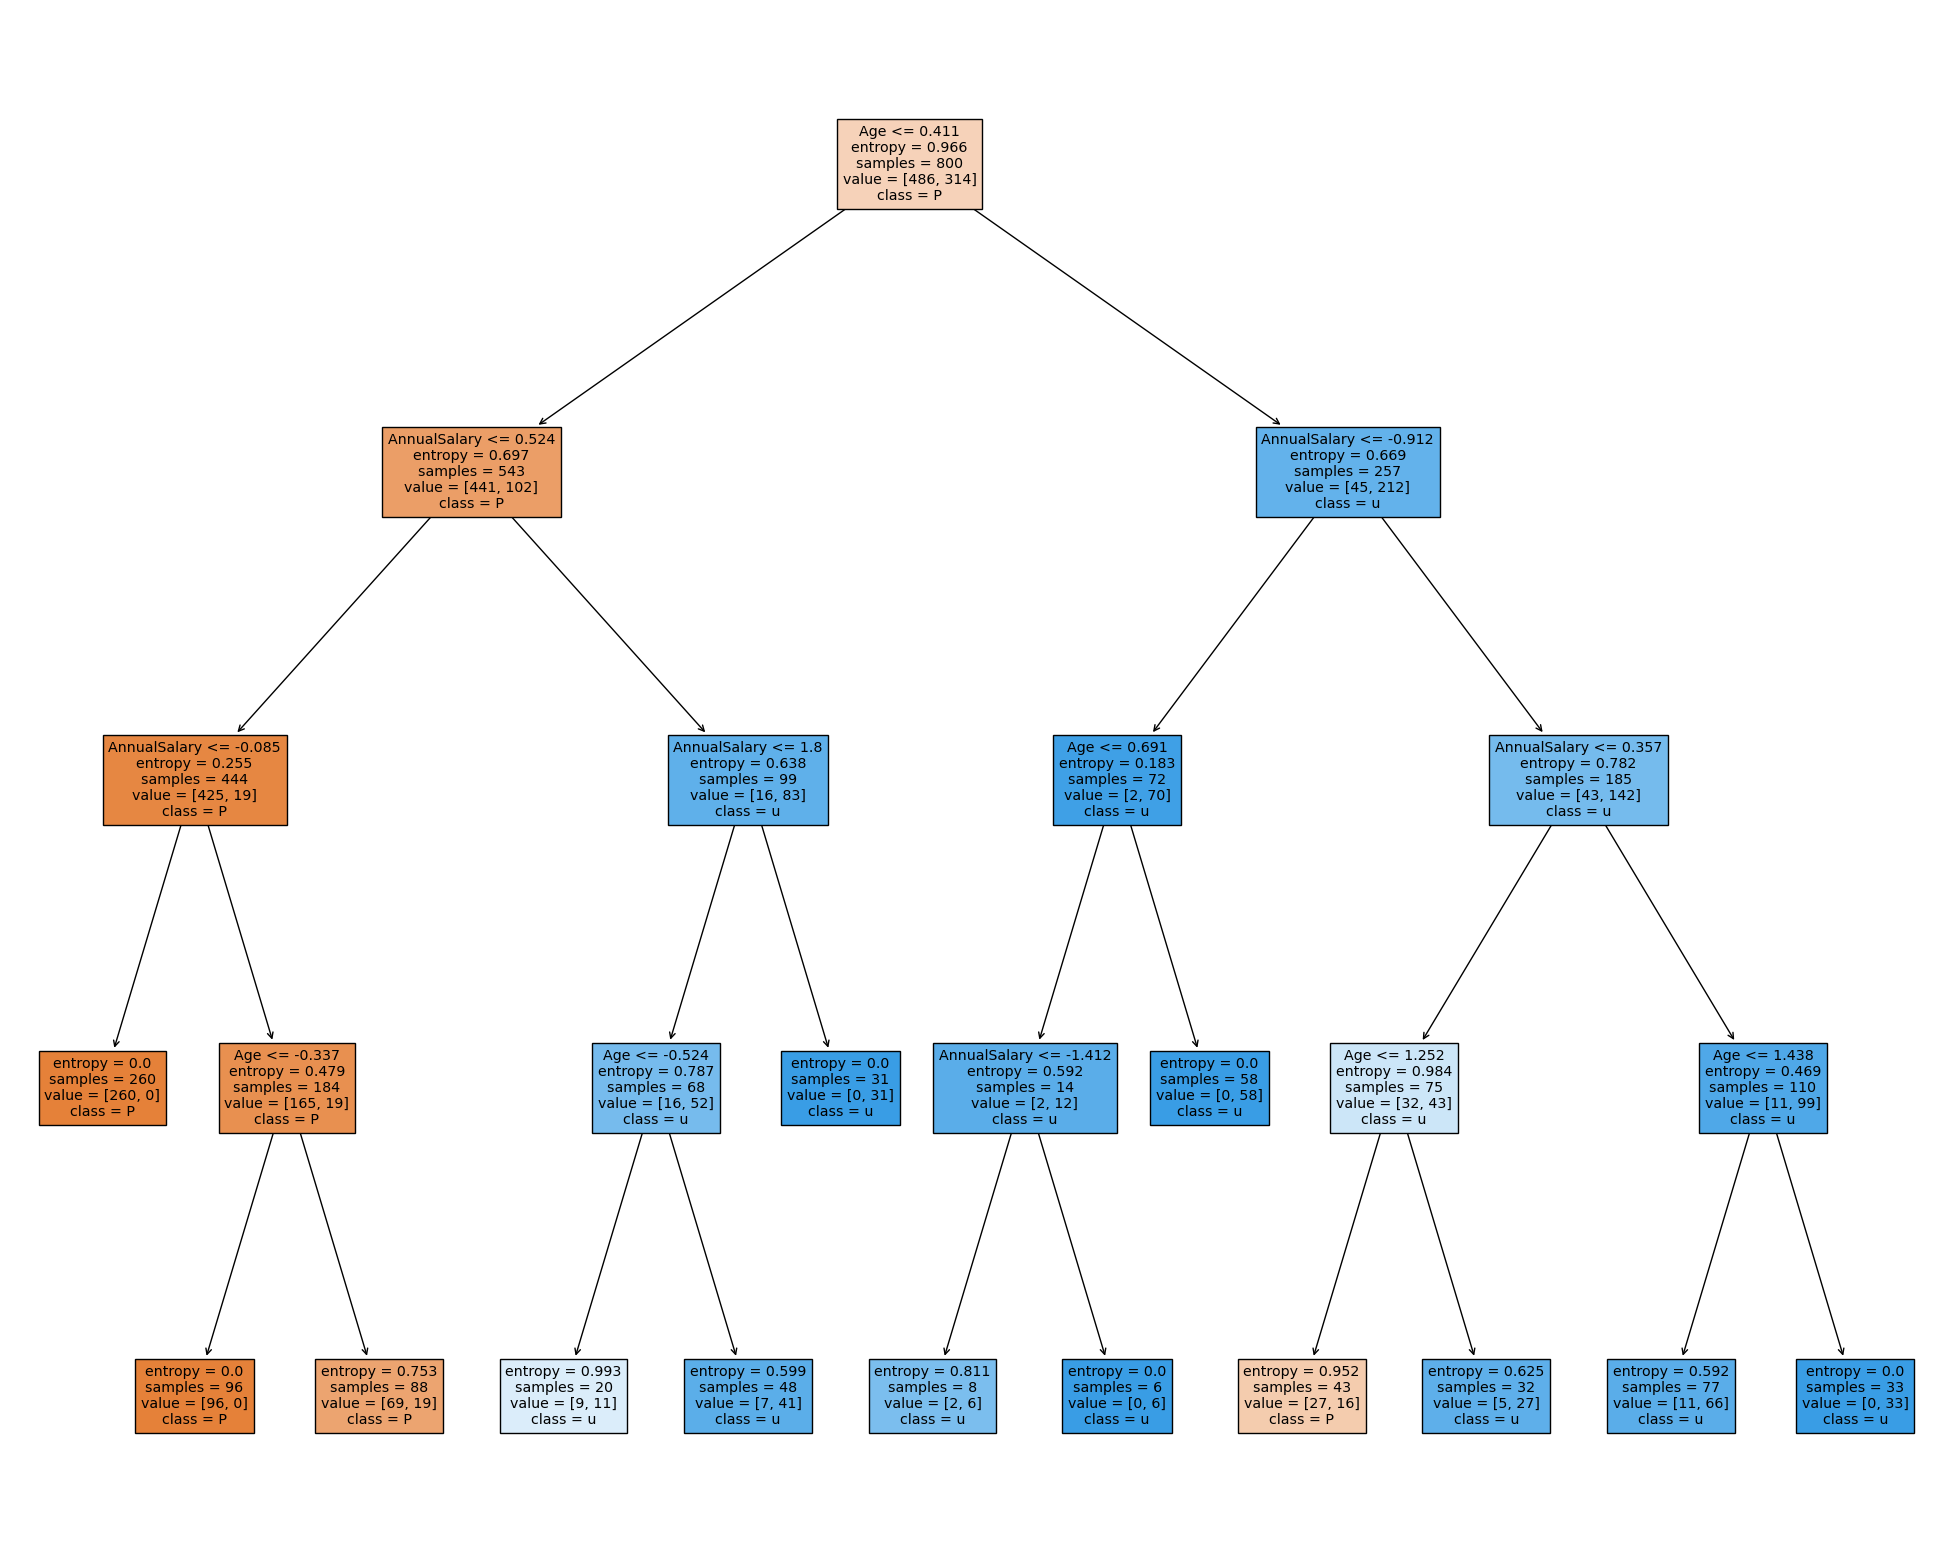

In [228]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
names = ['Age', 'AnnualSalary']
class1 = 'Purchased'

_ = tree.plot_tree(tree1, 
                   feature_names=names,  
                   class_names=class1,
                   filled=True)

In [ ]:
# pip install graphviz

In [ ]:
# pip install pydot

## Model 3: Random Forest

In [231]:
# Building Random Forest model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

In [232]:
# Predicting on test data
rf_pred = rf.predict(test_x)

In [233]:
# Performance metrics
print('training score: %0.2f' %rf.score(train_x,train_y),'\n')
print('testing score: %0.2f' %rf.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, rf_pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, rf_pred),'\n')
print('Classification report: \n',classification_report(test_y, rf_pred))

training score: 0.99 

testing score: 0.90 

Accuracy is: 0.90 

confusion matrix: 
 [[106   6]
 [ 15  73]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       112
           1       0.92      0.83      0.87        88

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



Training score 0.99 is more than testing score 0.90 which shows overfitting.

To solve problem of overfitting we will try hypertuning using GridSearchCV.

## Grid Search CV

In [234]:
# Hypertuning Random Forest model
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuned_paramaters = [{'criterion':['entropy', 'gini'], 
                     'max_depth':[3,4,5,6], 
                     'min_samples_split':[2,4,6,10], 
                     'min_samples_leaf':[1,2,3,4,5]}]
                     #'max_leaf_nodes':list(range(1,10))
    
random_for = RandomForestClassifier()                                  
rf_cv = GridSearchCV(random_for,
                     param_grid=tuned_paramaters, 
                     cv=kfold, 
                     verbose=1,
                     return_train_score=True)

rf_cv.fit(train_x, train_y)        

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6],
                          'min_samples_leaf': [1, 2, 3, 4, 5],
                          'min_samples_split': [2, 4, 6, 10]}],
             return_train_score=True, verbose=1)

In [236]:
# Best parameters and estimator
print(rf_cv.best_params_)
print(rf_cv.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2)


In [237]:
# Training model on best parameters
rf1 = RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2) 
rf1 = rfe.fit(train_x,train_y)

# Predicting on test data
rf1_pred = rf1.predict(test_x)

In [238]:
# Performance metrics
print('training score: %0.2f' %rf1.score(train_x,train_y),'\n')
print('testing score: %0.2f' %rf1.score(test_x,test_y),'\n')
print('Accuracy is: %0.2f'%accuracy_score(test_y, tree1_pred),'\n')
print('confusion matrix: \n',confusion_matrix(test_y, rf1_pred),'\n')
print('Classification report: \n',classification_report(test_y, rf1_pred))

training score: 0.83 

testing score: 0.82 

Accuracy is: 0.90 

confusion matrix: 
 [[104   8]
 [ 27  61]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       112
           1       0.88      0.69      0.78        88

    accuracy                           0.82       200
   macro avg       0.84      0.81      0.82       200
weighted avg       0.83      0.82      0.82       200



Random forest model is performing better than logistic regression but not better than Decision tree.

# Conclusion 

As we can see here 
- Logistic Regression:  Accuracy = 0.82, F1 score = 0.77
- Decision Tree Classifier:  Accuracy = 0.90, F1 score = 0.88
- Random Forest Classifier:  Accuracy = 0.90, F1 score = 0.78

Age and AnnualSalary are important features for predicting car purchase decision.

Decision Tree has performed better in predicting car purchase decision.